# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [8]:
# YOUR CODE HERE
df = pd.read_csv('ca_dds_expenditures.csv')
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


<AxesSubplot:xlabel='Ethnicity'>

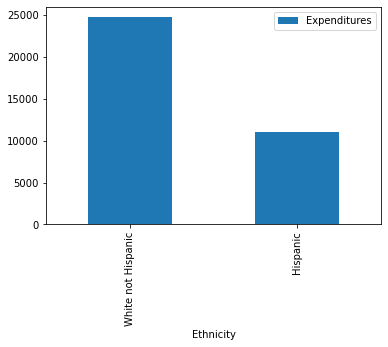

In [9]:
table = pd.pivot_table(data=df, values='Expenditures', index=['Ethnicity'], aggfunc=np.mean)
table.loc[['White not Hispanic', 'Hispanic']].plot(kind='bar')

In the data set we are able to observe that there the expeditures for Hispanic people are much lower that those that are white and not hispanic. We can also see there is a change of about 13,000 than Hispanics.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<AxesSubplot:xlabel='Ethnicity,Age Cohort'>

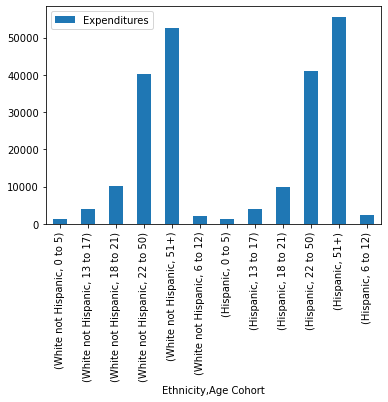

In [10]:
# YOUR CODE HERE
table = pd.pivot_table(data=df, values='Expenditures', index=['Ethnicity', 'Age Cohort'], aggfunc=np.mean)
table.loc[['White not Hispanic', 'Hispanic']].plot(kind='bar')

When comparing the expenditures we can see that the age cohort and the ethnicity are very close to each other. This is different from question one in which we were not comapring against the age cohort.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [11]:
# YOUR CODE HERE (although you may want to add more code cells)

# Diagrams showing:

0      13 to 17
1      22 to 50
4      13 to 17
6      13 to 17
8      13 to 17
         ...   
986    13 to 17
987    13 to 17
991    22 to 50
995         51+
999    22 to 50
Name: Age Cohort, Length: 401, dtype: object

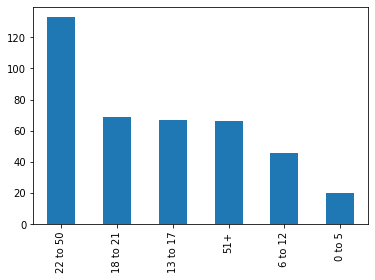

In [12]:
# distribution among White not Hispanic
whiteDist = df.loc[df['Ethnicity'] == 'White not Hispanic', 'Age Cohort']
whiteDist.value_counts().plot.bar()
whiteDist

2        0 to 5
3      18 to 21
5      13 to 17
9      13 to 17
11     13 to 17
         ...   
989     6 to 12
990      0 to 5
992    18 to 21
996    18 to 21
998     6 to 12
Name: Age Cohort, Length: 376, dtype: object

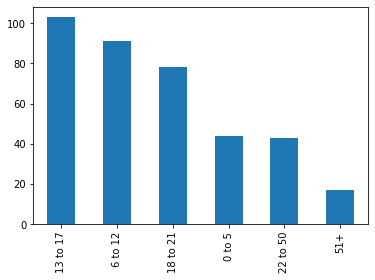

In [13]:
# distribution among age groups within Hispanic
hispanicDist = df.loc[df['Ethnicity'] == 'Hispanic', 'Age Cohort']
hispanicDist.value_counts().plot.bar()
hispanicDist

<AxesSubplot:xlabel='Age Cohort'>

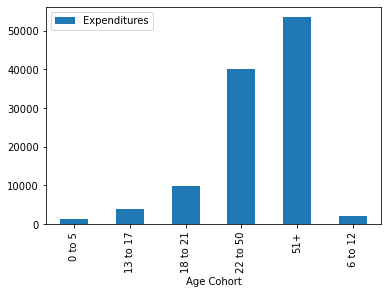

In [15]:
# average Expenditures for each age group regardless of race
table = pd.pivot_table(data=df, values='Expenditures', index=['Age Cohort'], aggfunc=np.mean)
table.plot(kind='bar')

Question 1 and 2 here do not match as we can see. This is due to the amount of people that are ranged between hispanic and non hispanic were very close to each other. We can clearly see that at the age range of 51+ both are very close which helps to see that 51+ age range is getting the most expenditures. Using this logic we can observe that the hispanic and non hispanic community were very close.